In [19]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd
import librosa

In [2]:
audio_info = pd.read_csv('DATASET/audio_info.csv')
audio_info.head()

NOME  CLASSE     INICIO        FIM GRUPO  \
0  00001.wav       3   5.000000   8.957732     A   
1  00001.wav       2  14.957755  16.126803     A   
2  00001.wav       3  22.126825  26.535374     A   
3  00001.wav       2  31.535397  33.254921     A   
4  00001.wav       3  40.254943  41.670907     A   

                              PATH   DURACAO  
0  DATASET/audio_files/00001_1.wav  3.957732  
1  DATASET/audio_files/00001_1.wav  1.169048  
2  DATASET/audio_files/00001_1.wav  4.408549  
3  DATASET/audio_files/00001_1.wav  1.719524  
4  DATASET/audio_files/00001_1.wav  1.415964

In [10]:
audio_info.describe()

CLASSE      INICIO         FIM     DURACAO
count  400.000000  400.000000  400.000000  400.000000
mean     2.500000   30.607957   32.730059    2.122102
std      0.500626   16.684267   16.777554    1.235336
min      2.000000    5.000000    5.711247    0.324286
25%      2.000000   14.955221   17.797188    1.310170
50%      2.500000   30.347143   32.190816    1.901701
75%      3.000000   44.626032   46.998662    2.639683
max      3.000000   59.895442   64.256961    8.257256

## Verificando os sons de um mesmo arquivo de áudio
Obs:
Para este exemplo foi selecionado o arquivo 00030.wav

In [13]:
wav = audio_info.query('NOME == "00030.wav"')
wav

NOME  CLASSE     INICIO        FIM GRUPO  \
213  00030.wav       2   7.000000   7.905873     C   
214  00030.wav       3  12.905896  13.806372     C   
215  00030.wav       2  20.806395  22.994195     C   
216  00030.wav       2  27.994218  29.994195     C   
217  00030.wav       2  36.994218  38.549456     C   
218  00030.wav       3  44.549478  47.238798     C   
219  00030.wav       2  54.238821  56.356145     C   

                                PATH   DURACAO  
213  DATASET/audio_files/00030_1.wav  0.905873  
214  DATASET/audio_files/00030_1.wav  0.900476  
215  DATASET/audio_files/00030_1.wav  2.187800  
216  DATASET/audio_files/00030_1.wav  1.999977  
217  DATASET/audio_files/00030_1.wav  1.555238  
218  DATASET/audio_files/00030_1.wav  2.689320  
219  DATASET/audio_files/00030_1.wav  2.117324

In [14]:
print(wav['PATH'].iloc[0])
ipd.Audio(wav['PATH'].iloc[0])

DATASET/audio_files/00030_1.wav


## Pronto, agora com todos os arquivos de áudio indexados, vamos carregá-los em memória para construção do Dataframe de features

NOME                             00045.wav
CLASSE                                   2
INICIO                            6.000000
FIM                               7.999977
GRUPO                                    D
PATH       DATASET/audio_files/00045_1.wav
DURACAO                           1.999977
Name: 300, dtype: object


Text(0.5, 1.0, 'Sinal no domínio do tempo (em segundos)')

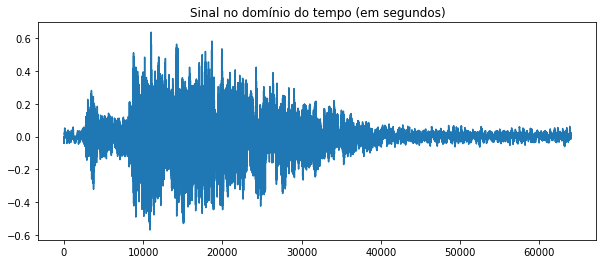

In [37]:
SAMPLE_RATE = 32000
def get_sound_as_float(info_row):
    sound, sr = librosa.load(info_row['PATH'], 
                             sr=SAMPLE_RATE, 
                             offset=info_row['INICIO'], 
                             duration=info_row['DURACAO'])
    return sound

sound_float = get_sound_as_float(audio_info.iloc[300,])
plt.figure(figsize=(10,4))
plt.plot(sound_float)
print(audio_info.iloc[300,])
plt.title('Sinal no domínio do tempo (em segundos)')